<a href="https://colab.research.google.com/github/rodirk/spezielle_bioinfo_2_22/blob/main/Spezielle_bioinformatik_II_image_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import 

In [ ]:
!pip install ipympl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import ipympl

In [ ]:
%matplotlib widget

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

### Image Basics

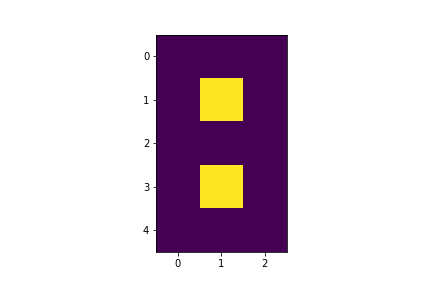

In [ ]:
#load image

image = skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")
plt.imshow(image)

In [ ]:
print(image.shape)
print(image)

(5, 3)
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


[[0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


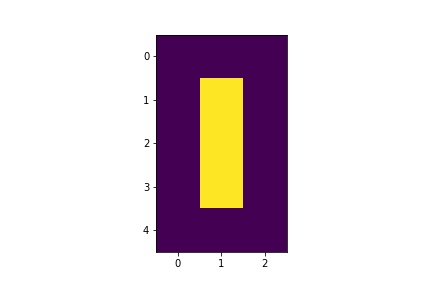

In [ ]:
#Manipulate Array

zero = skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")
zero[2,1]=1.0

#plot in a new interactive figure
fig,ax =plt.subplots()
plt.imshow(zero)
print(zero)

[[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


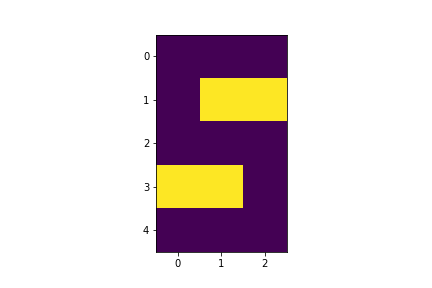

In [ ]:
#Aufgabe 1: Mache aus der 8 eine 5

five = skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")
five[1,2] = 1.0
five[3,0] = 1.0

fig,ax =plt.subplots()
plt.imshow(five)
print(five)

### Colors

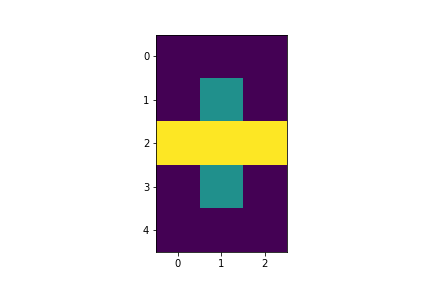

In [ ]:
drei_farben =skimage.io.imread(fname="/content/drive/MyDrive/data/eight.tif")

#Gesamtes Array it 128 multiplizieren
drei_farben = drei_farben * 128

#mittlere reihe auf 255 setzen

drei_farben[2,:] = 255


fig,ax =plt.subplots()
plt.imshow(drei_farben)

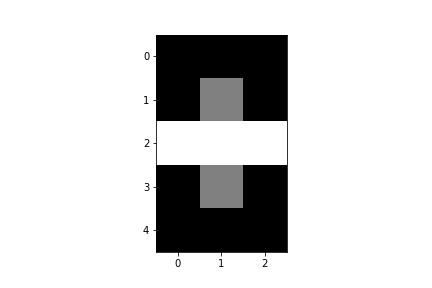

In [ ]:
#Bild in Graustufen anzeigen lassen

fig,ax =plt.subplots()
plt.imshow(drei_farben, cmap=plt.cm.gray)

[[[125 220 173]
  [112 177 241]
  [240 183  88]
  [ 18  24 144]]

 [[ 53  41  33]
  [ 27  11 147]
  [126  94 232]
  [203  48 147]]

 [[166  72 142]
  [ 93  16 250]
  [218 139 222]
  [ 97 130 208]]

 [[245  15 151]
  [229  81  87]
  [213 165 244]
  [184 242 122]]]


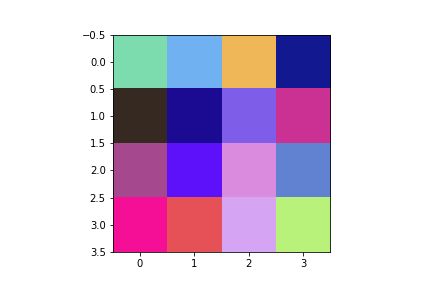

In [ ]:
#Seed setzen

pseudorandom = np.random.RandomState(2022)

#4x4 matrix mit drei dimensionen erstellen
checkerboard = pseudorandom.randint(0,255, size=(4,4,3))

#plotten
fig,ax =plt.subplots()
plt.imshow(checkerboard)

#zeig arrays
print(checkerboard)

In [ ]:
#infos rechts oben pixel
pixel_ro = checkerboard[1,3,:]
pixel_ro

array([203,  48, 147])

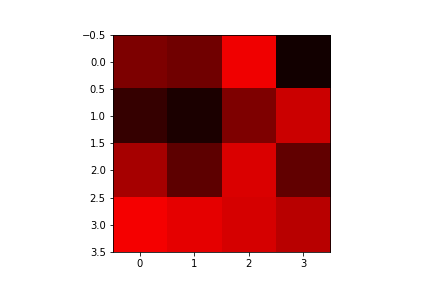

In [ ]:
#Channel einzeln ansehen'

red_channel = checkerboard * [1,0,0]

#plotten
fig,ax =plt.subplots()
plt.imshow(red_channel)

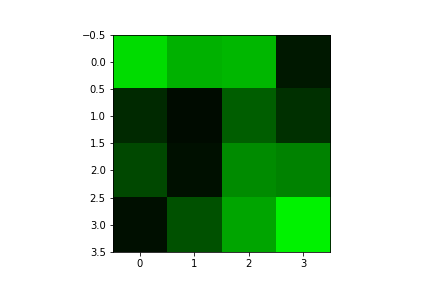

In [ ]:
green_channel = checkerboard * [0,1,0]

#plotten
fig,ax =plt.subplots()
plt.imshow(green_channel)

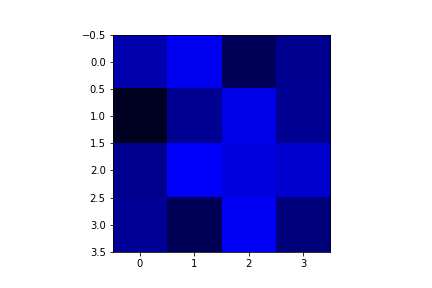

In [ ]:
blue_channel = checkerboard * [0,0,1]

#plotten
fig,ax =plt.subplots()
plt.imshow(blue_channel)

### Lesson 2: Working with skimage

Aufgabe: Schreibt eine Funktion, die das Plotten der Bilder vereinfacht.

In [ ]:
def plot(img):
  fig,ax =plt.subplots()
  plt.imshow(img) 

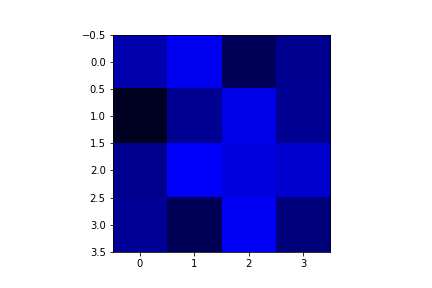

In [ ]:
plot(blue_channel)

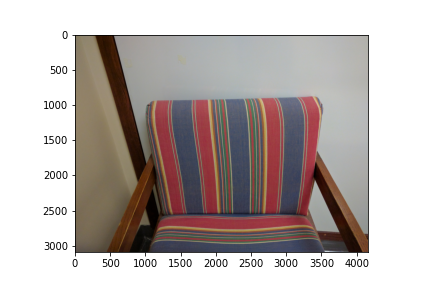

In [ ]:
#Laden des Stuhlbildes
image =skimage.io.imread("/content/drive/MyDrive/data/chair.jpg")

plot(image)

In [ ]:
#speichern als Tiff

skimage.io.imsave("/content/drive/MyDrive/data/chair.tif", arr=image2)

In [ ]:
import skimage.transform

In [ ]:
#Verkleinern des Bildes auf 10% der Größe

new_shape = (image.shape[0] // 10, image.shape[1] // 10, image.shape[2])

small = skimage.transform.resize(image=image, output_shape=new_shape)
small = skimage.img_as_ubyte(small)

new_shape

(308, 416, 3)

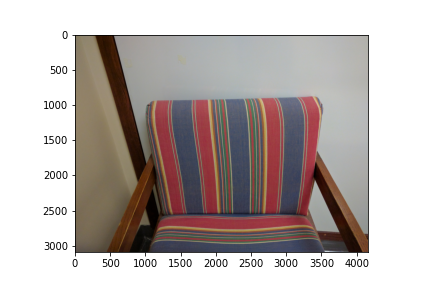

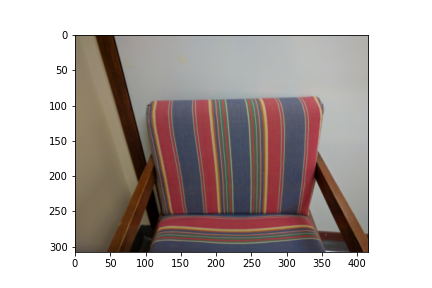

In [ ]:
# Lösung der Aufgabe "Bild laden, Größe auf 10%, Bild speichern als Tif, Bild + kleines Bild Plotten":

# Laden des Bildes

image =skimage.io.imread("/content/drive/MyDrive/data/chair.jpg")

# Bild auf 10% der Größe verkleinern 

new_shape = (image.shape[0] // 10, image.shape[1] // 10, image.shape[2])

small = skimage.transform.resize(image=image, output_shape=new_shape)
small = skimage.img_as_ubyte(small)

#Bild speichern als Tif

skimage.io.imsave("/content/drive/MyDrive/data/chair_small.tif", arr=small)

#Original + Small plotten

plot(image)
plot(small)



### Pixel manipulieren 

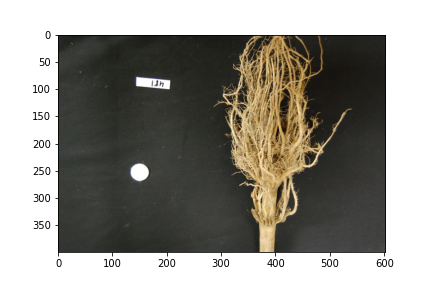

In [ ]:
#read image
root = skimage.io.imread("/content/drive/MyDrive/data/maize-root-cluster.jpg")

plot(root)

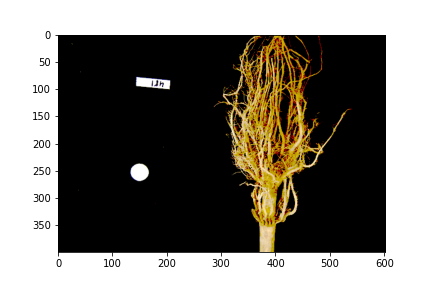

In [ ]:
#nur hohe intensitäten behalten
root[root <128] = 0

plot(root)

### Konvertierung zu Grayscale Bildern 

In [ ]:
import skimage.color

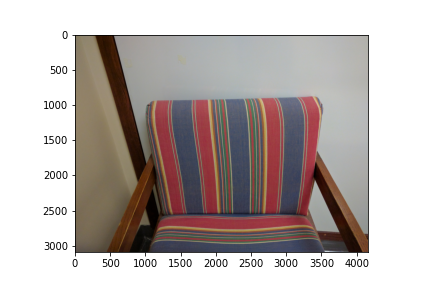

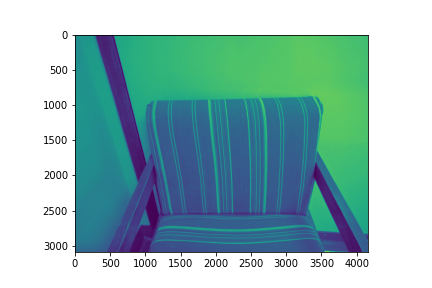

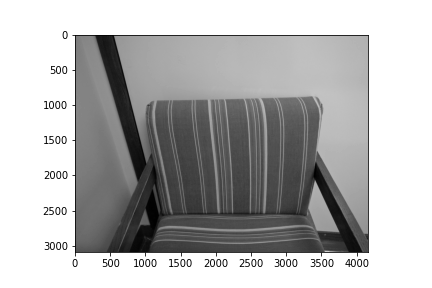

In [ ]:
#Bild laden
image =skimage.io.imread("/content/drive/MyDrive/data/chair.jpg")

plot(image)


#Konvertieren zu Grayscale

gray_image = skimage.color.rgb2gray(image)
plot(gray_image)


fig,ax = plt.subplots()
plt.imshow(gray_image, cmap="gray")

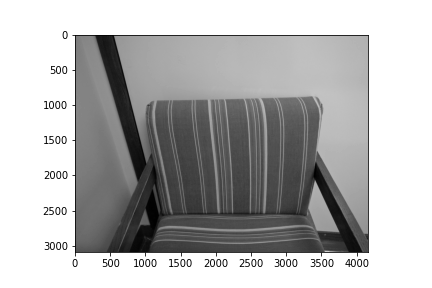

In [ ]:
#Bild laden
image2 =skimage.io.imread(fname="/content/drive/MyDrive/data/chair.jpg", as_gray=True)

fig,ax = plt.subplots()
plt.imshow(image2, cmap="gray")

### Bildausschnitte via Array-Slicing

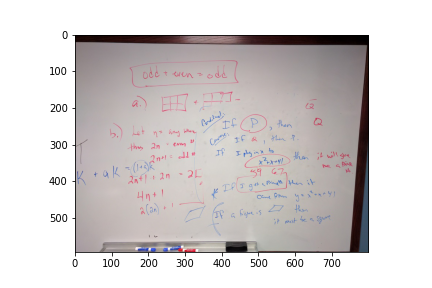

In [ ]:
# Bild laden 

board =skimage.io.imread(fname="/content/drive/MyDrive/data/board.jpg")

plot(board)

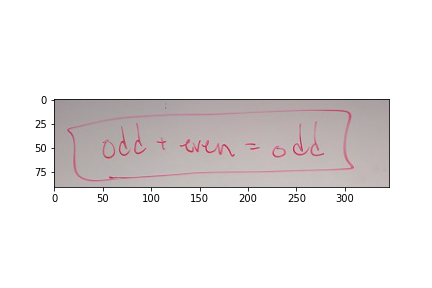

In [ ]:
#ausschnitt des Bildbereichs
clip = board[60:151, 135:481, :]
plot(clip)

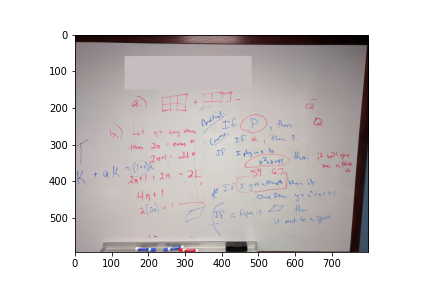

In [ ]:
#farbe ersetzten im originalbild

color = board[330, 90]
board[60:151, 135:481] = color

plot(board)

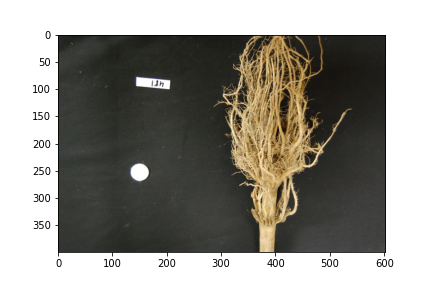

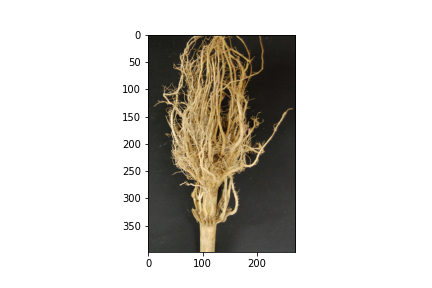

In [ ]:
### Aufgabe: Schneide die Wurzel aus und Plotte sie

#read image
root = skimage.io.imread("/content/drive/MyDrive/data/maize-root-cluster.jpg")

plot(root)


#ausschneiden und plotten:

clip = root[1:400, 275:545, :]
plot(clip)